# ¿Cómo mejorar el método de integración?

En el método de Euler para resolver ecuaciones diferenciales escribimos la función mediante una serie de Taylor truncada a segundo orden. Una opción para aumentar la precisión del algoritmo es aumentar el número de términos utilizados en la serie.

Pero... ¿Qué tan factible es hacer eso?

Inicialmente se tenía que:


$$
Y_{n+1}=y_n+hf(x_n,y_n)
$$

Lo cual proviene de:

$$
\int \limits_{x_n}^{x_{n+1}} y'(x)dx=\int \limits_{x_n}^{x_{n+1}} f(x,y)dx
$$

$$y(x_{n+1})=y(x_n)+\int \limits_{x_n}^{x_{n+1}} f(x,y)dx$$

$$y_{n+1}=y_n+ \int \limits_{x_n}^{x_{n+1}} f(x,y)dx \ \ \ \ \ \dots(a)$$

$$f(x,y)=f(x_n,y_n)+f'(x_n,y_x)h+f''(x_n,y_n)\frac{h^2}{2!}+O(h^3)$$

$$f(x,y)\simeq f(x_n,y_n) + O(h)$$

Una opción es:

$$y_{n+1}=y_n+hf(x_n,y_n)+O(h^2)$$

Pero una mejor opción es:

$$f(x,y) \simeq f(x_n,y_n)+f'(x_n,y_n)h+O(h^2)$$

$$\frac{d}{dx}f(x,y)=\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}\frac{dy}{dx}+\frac{\partial f}{\partial y}f$$

Con ésta derivación anterior podemos describir de una mejor manera la expresión (*), quedando como:

$$
y_n+1= y_n+hf+\frac{h^2}{2} \left( \frac{\partial f}{\partial x} +\frac{\partial f}{\partial y}f \right) + O(h^3)
$$

donde $f$ y sus parciales están evaluadas en $f(x_n,y_n)$

OBS: el tercer término proviene del hecho de que las funciones están evaluadas en $x_n,y_n$ y por lo tanto es una constante 

In [28]:
from pylab import*
%matplotlib inline

### Entonces, el código de la ecuación original era:

In [29]:
def euler_1orden(ec_diff,p_ini,t_final,h=0.1):
    tiempo = arange(0,t_final+h, h)
    y = zeros(len(tiempo))
    y[0]= p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
    return tiempo,y

### Y el código de nuestra nueva ecuación es:

In [30]:
def euler_2orden(ec_diff,p_ini,t_final,ec_jac,h=0.1):
    tiempo = arange(0,t_final+h, h)
    y = zeros(len(tiempo))
    y[0]= p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y

### Vamos a probar que tanto mejoro nuestro código!!!

In [31]:
def ec_1(y,x):
    return x*sin(y)

def d_ec_1(y,x):
    return sin(y),x*cos(y)

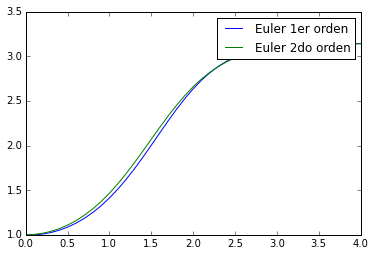

In [60]:
y_euler_01=euler_1orden(ec_1,1,4,0.1) 
y_euler_02=euler_2orden(ec_1,1,4.,d_ec_1,0.1)

plot(y_euler_01[0],y_euler_01[1],label='Euler 1er orden')
plot(y_euler_02[0],y_euler_02[1],label='Euler 2do orden')
legend()
show()

La diferencia entre ambas soluciones es visible únicamente para valores grandes de h... osea que no 

### Y sobre la precisión con h en cada caso?

#### Primer orden

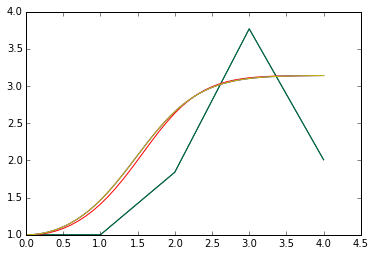

In [59]:
h=[1,1.,0.1,0.001,0.0001,0.00001]
for s in h:
    y_euler_01=euler_1orden(ec_1,1,4.,s)
    plot(y_euler_01[0],y_euler_01[1])#,label'h= 't)

#### Segundo orden

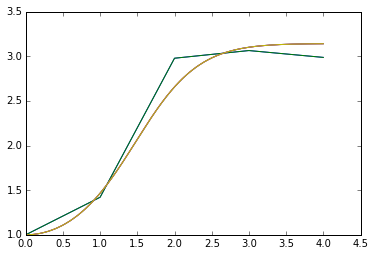

In [58]:
h=[1, 1.,0.1,0.001,0.0001,0.00001]
for s in h:
    y_euler_02=euler_2orden(ec_1,1,4.,d_ec_1,s)
    plot(y_euler_02[0],y_euler_02[1])#,label'h= 't)

NOTA: para funciones multivariables la ec. de euler a segundo orden es de la forma:

$$
y_{n+1}=y_n+hf(x_n,y_n)+\frac{h^2}{2}\left( \frac{\partial f(x_n,y_n)}{\partial x} \right)+J(f(x,y_n)f(x_n,y_n))
$$